IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
df_1=df_1.drop_duplicates()
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...    amp2(C13)  \
0            96.0    3.596543    3.414090 -0.014483  ...  1316

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      79.0 -0.053388   0.025675   -0.918372   0.168717          0.0   
1      41.0 -0.055349   0.027175   -0.971237   0.173693          0.0   
2      64.0 -0.047218   0.016176   -0.481830   0.135523        108.0   
3      11.0  0.001594   0.011049    3.216197   0.104983         64.0   
4       5.0 -0.062369   0.010979    0.750795   0.121811          0.0   
...     ...       ...        ...         ...        ...          ...   
1344   10.0 -0.020886   0.009800    2.521520   0.101042         54.0   
1345   41.0 -0.009766   0.011886    2.221443   0.109323         61.0   
1346    3.0  0.010313   0.007615   -0.469214   0.087748         67.0   
1347    7.0 -0.062669   0.010941    0.762613   0.121810          0.0   
1348   24.0 -0.138179   0.033012   -0.759392   0.228073          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...    amp2(C13)  \
0            86.0   27.948114    2.942076 -0.017789  ...  2444

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.053388   0.025675   -0.918372   0.168717          0.0         86.0   
1    -0.055349   0.027175   -0.971237   0.173693          0.0         80.0   
2    -0.047218   0.016176   -0.481830   0.135523        108.0        133.0   
3     0.001594   0.011049    3.216197   0.104983         64.0         85.0   
4    -0.062369   0.010979    0.750795   0.121811          0.0        100.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.020886   0.009800    2.521520   0.101042         54.0         74.0   
1345 -0.009766   0.011886    2.221443   0.109323         61.0         81.0   
1346  0.010313   0.007615   -0.469214   0.087748         67.0         76.0   
1347 -0.062669   0.010941    0.762613   0.121810          0.0         77.0   
1348 -0.138179   0.033012   -0.759392   0.228073          0.0        102.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...    amp2(

### Bilanciamento del dataset

In [7]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [8]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.053388   0.025675   -0.918372   0.168717     0.000000    86.000000   
1    -0.055349   0.027175   -0.971237   0.173693     0.000000    80.000000   
2    -0.047218   0.016176   -0.481830   0.135523   108.000000   133.000000   
3     0.001594   0.011049    3.216197   0.104983    64.000000    85.000000   
4    -0.062369   0.010979    0.750795   0.121811     0.000000   100.000000   
...        ...        ...         ...        ...          ...          ...   
1618 -0.140881   0.040473   -1.502645   0.245395    92.553848    76.015372   
1619 -0.023217   0.006978   -0.507286   0.086596   105.944641    77.736160   
1620 -0.022681   0.006925   -0.491379   0.086149   103.608950    78.000000   
1621 -0.038548   0.010149    1.781053   0.107758    93.879730    84.549826   
1622 -0.001842   0.007055   -0.249917   0.083918     0.000000   120.607089   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...    amp1(

# Selezione feature più importanti

In [9]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_classif, k=15)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=15)
[False False False False False False False False  True  True False  True
  True False  True False False False False  True False False False False
  True False False False  True False  True  True  True False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


In [10]:
features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

    Input_Features     F_Score
28     freq1(AccX)  832.251693
12     freq1(GyrY)  831.983188
34      kurt(AccY)  807.844860
30      amp1(AccX)  671.663548
32        <>(AccY)  667.868981
78        amp1(C9)  630.847380
24        <>(AccX)  611.022366
35       RMS(AccY)  601.121295
8         <>(GyrY)  591.308042
31      amp2(AccX)  553.821637
79        amp2(C9)  491.981457
9        var(GyrY)  486.146426
19       RMS(GyrZ)  470.182003
11       RMS(GyrY)  468.456222
14      amp1(GyrY)  449.849570
46      amp1(AccZ)  429.909372
17       var(GyrZ)  428.358150
41       var(AccZ)  394.271530
6       amp1(GyrX)  385.490873
111      amp2(C13)  384.591424
110      amp1(C13)  362.195668
103      amp2(C12)  353.394286
56       <>(Pitch)  349.181520
81        var(C10)  327.012044
118      amp1(C14)  325.124689
97        var(C12)  324.317363
62     amp1(Pitch)  312.788330
22      amp1(GyrZ)  288.368166
48        <>(Roll)  285.195357
27       RMS(AccX)  281.031274
10      kurt(GyrY)  280.004910
86      

In [11]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[0, 1, 2, 3, 4, 5, 6, 7, 10, 13, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 29, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]


In [12]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  RMS(GyrZ)  \
0    -0.017789   0.007923   0.090669   115.000000   12.397741   0.231013   
1    -0.016608   0.007862   0.090099    97.000000    6.583506   0.197567   
2     0.004573   0.026147   0.161569     0.000000   19.203390   0.186580   
3     0.066306   0.011576   0.126255    67.000000    1.854545   0.112926   
4     0.024816   0.007271   0.088692    99.000000    3.703369   0.106471   
...        ...        ...        ...          ...         ...        ...   
1618  0.027455   0.008848   0.097876    93.769238    1.963492   0.151401   
1619  0.045075   0.012515   0.120476   111.625441   18.012918   0.150349   
1620  0.044910   0.012549   0.120552   112.304475   17.791986   0.150567   
1621 -0.010499   0.005819   0.076917   117.714778    8.215989   0.108119   
1622  0.012604   0.005233   0.073347   113.747785    2.701145   0.153420   

      <>(AccX)  freq1(AccX)  amp1(AccX)  amp2(AccX)  <>(AccY)  kurt(AccY)  \
0    -0.24

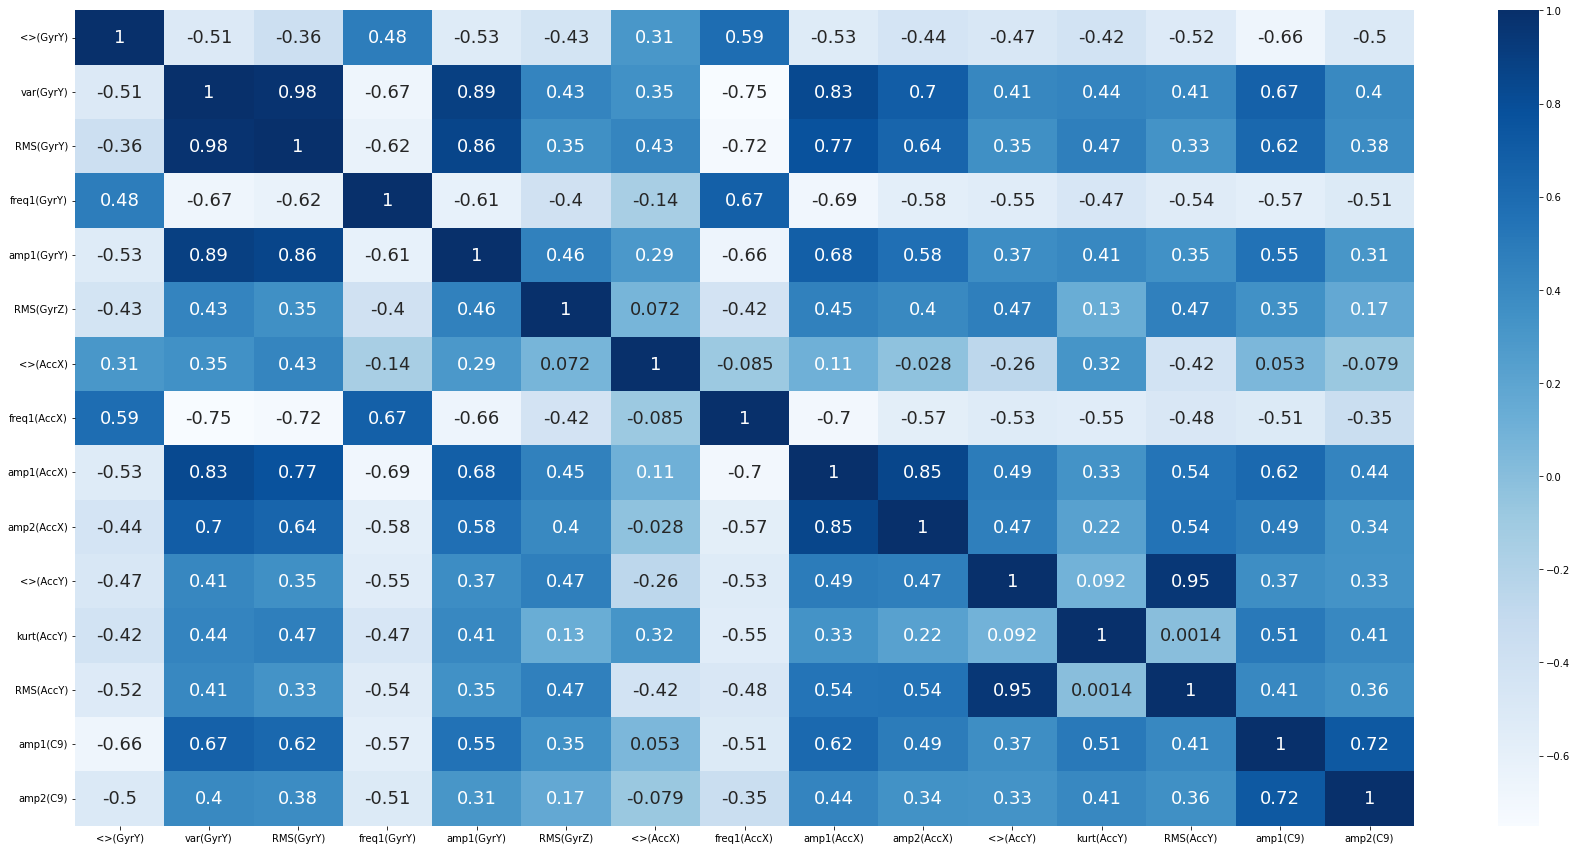

In [13]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

In [14]:
x = x.drop(['var(GyrY)','<>(AccY)','amp1(AccX)'], axis=1)

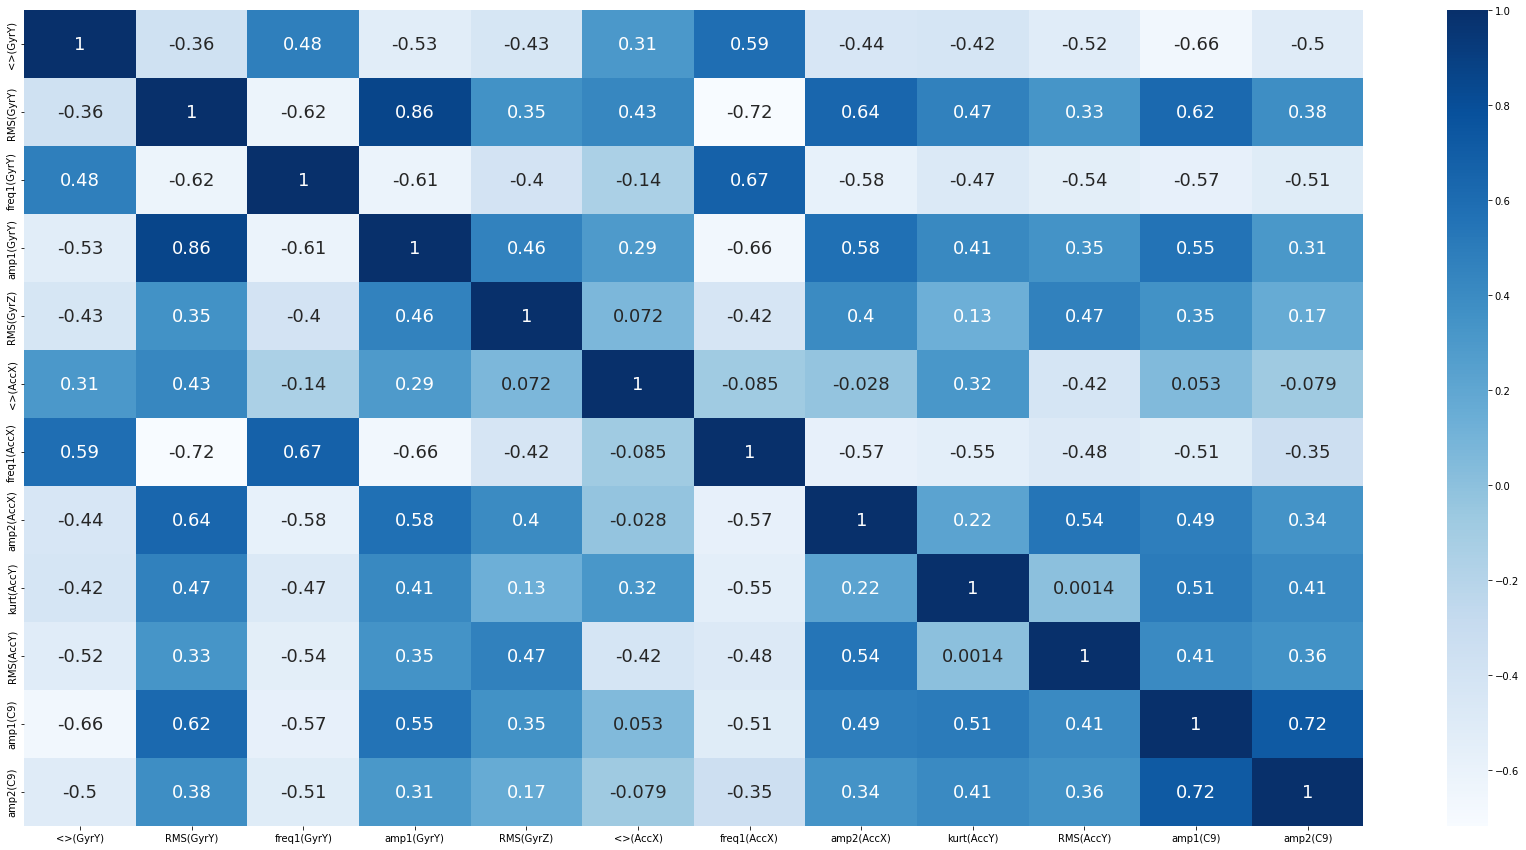

In [15]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [16]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1298, 12)
(325, 12)
(1298, 1)
(325, 1)


In [17]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs, criterion="entropy",max_depth=1),
    RandomForestClassifier(n_estimators = 1000,max_depth=1, random_state=rs,bootstrap=False),
    #AdaBoostClassifier(n_estimators=1000, random_state= rs),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

Cross-Validation: [0.81153846 0.80769231 0.77692308 0.81853282 0.81081081]
Accuracy: 0.85 	 ---> LogisticRegression 


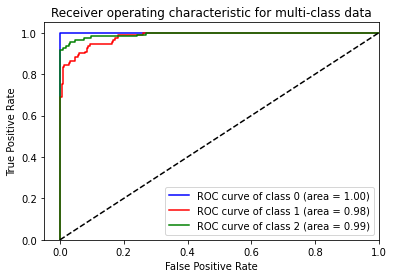

----------------------------------------------------
Cross-Validation: [0.64615385 0.66153846 0.65769231 0.66023166 0.66023166]
Accuracy: 0.65 	 ---> DecisionTreeClassifier 


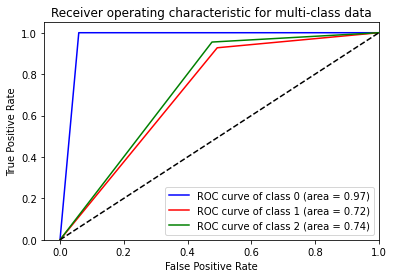

----------------------------------------------------
Cross-Validation: [0.95384615 0.97307692 0.95384615 0.96138996 0.95752896]
Accuracy: 0.96 	 ---> RandomForestClassifier 


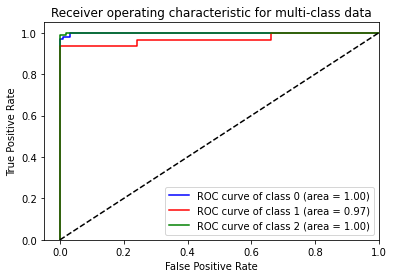

----------------------------------------------------
Cross-Validation: [0.65384615 0.61153846 0.63461538 0.68725869 0.68339768]
Accuracy: 0.66 	 ---> SVC 


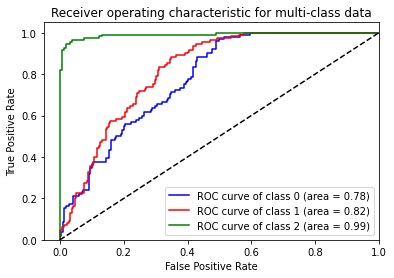

----------------------------------------------------
Cross-Validation: [0.88846154 0.82307692 0.88846154 0.81853282 0.81853282]
Accuracy: 0.86 	 ---> MLPClassifier 


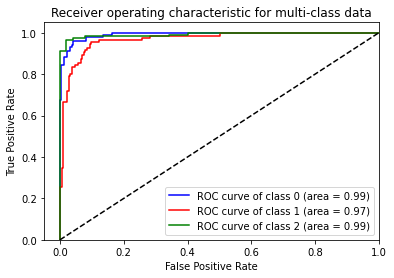

----------------------------------------------------
Cross-Validation: [0.63076923 0.57692308 0.70384615 0.76447876 0.64864865]
Accuracy: 0.64 	 ---> SGDClassifier 


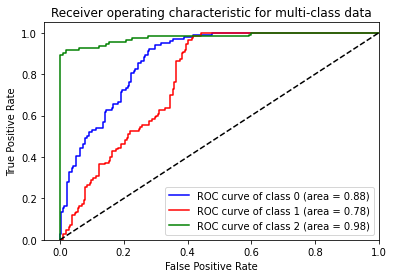

----------------------------------------------------


In [18]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

n_classes = 3

j=0
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    '''guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')  '''  
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    #fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)

    if (j == 1) | (j == 2) | (j == 4):
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)
    else:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

    print("----------------------------------------------------")

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### Matrici di confusione

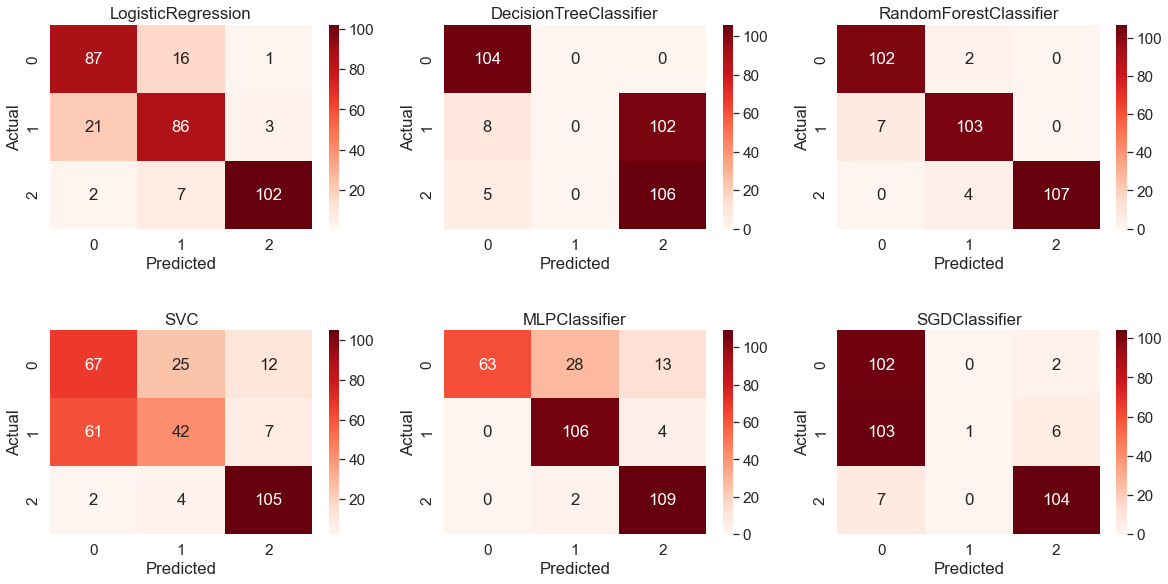

In [19]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Scores

Text(0.5, 1.0, 'Cross validation scores')

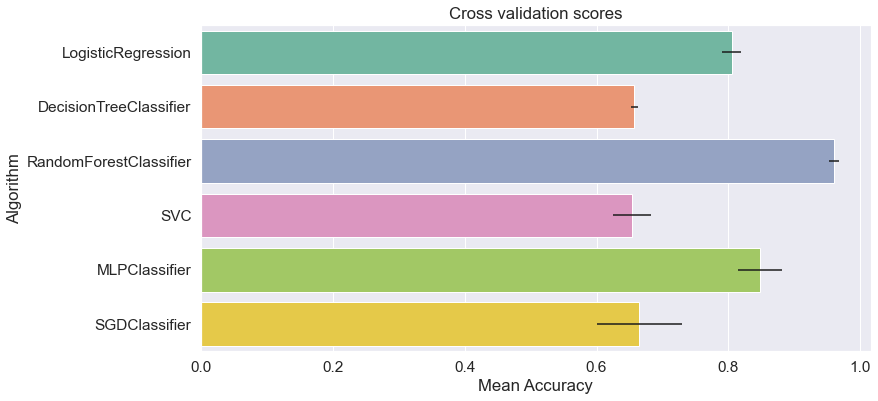

In [20]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [ ]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])